In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import seaborn as sns 
import mpld3

grid_style = {
    'axes.edgecolor': '#CCCCCC',
    'font.family': ['Calibri'],
}

In [2]:
df = pd.read_csv('/Users/hamsinisankaran/Downloads/DSDataAll.csv')

In [3]:
df.head()

,account_id,amount,date,name,category,category_id,user_id
0,MMyB5JRbmJUB8QrpdnLdUo4MBwkvqMSQ6Y3w0,10,2017-11-24 00:00:00,Bill Payment CITI CARDS CBOL 10021,Transfer,21003000.0,1.0
1,E56dBbR4rbiYaB8730L3SYjKo6P3AKsw4DBNn,-10,2017-11-24 00:00:00,PAYMENT THANK YOU,Payment,16001000.0,1.0
2,MMyB5JRbmJUB8QrpdnLdUo4MBwkvqMSQ6Y3w0,800,2017-11-13 00:00:00,ACH Electronic Debit - DISCOVER E-PAYMENT 653,Payment,16001000.0,1.0
3,E56dBbR4rbiYaB8730L3SYjKo6P3AKsw4DBNn,-921,2017-11-10 00:00:00,PAYMENT THANK YOU,Payment,16001000.0,1.0
4,MMyB5JRbmJUB8QrpdnLdUo4MBwkvqMSQ6Y3w0,921,2017-11-10 00:00:00,Transfer to MasterCard 08:22p #0256 ONLINE Re,Transfer,21006000.0,1.0


In [4]:
df.columns

Index(['account_id', 'amount', 'date', 'name', 'category', 'category_id',
       'user_id'],
      dtype='object')

In [5]:
df.describe()

,amount,category_id,user_id
count,4528.000000,4.197000e+03,4441.000000
mean,-18.922261,1.842135e+07,5756.762441
std,695.385081,3.305112e+06,2284.854602
min,-12103.000000,1.000000e+07,1.000000
25%,2.000000,1.600100e+07,4380.000000
50%,10.000000,1.904700e+07,6993.000000
75%,43.000000,2.100600e+07,6993.000000
max,5000.000000,2.201500e+07,9652.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fc4e400>,
      dtype=object)

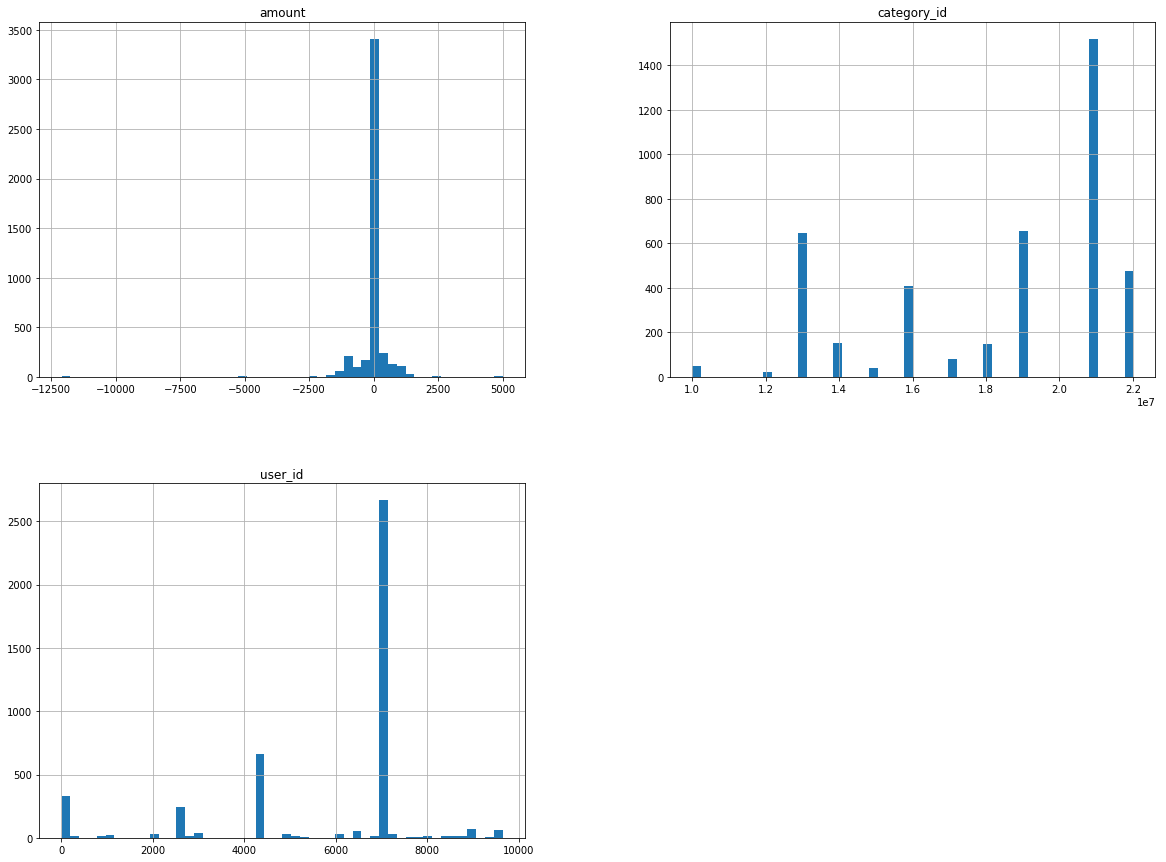

In [6]:
# feature histograms
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

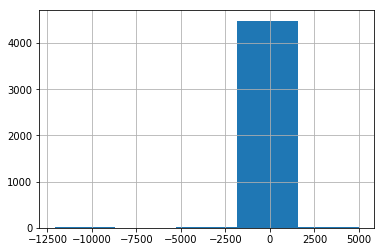

In [7]:
df['amount'].hist(bins=5)

/Users/hamsinisankaran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ac55d68>,
      dtype=object)

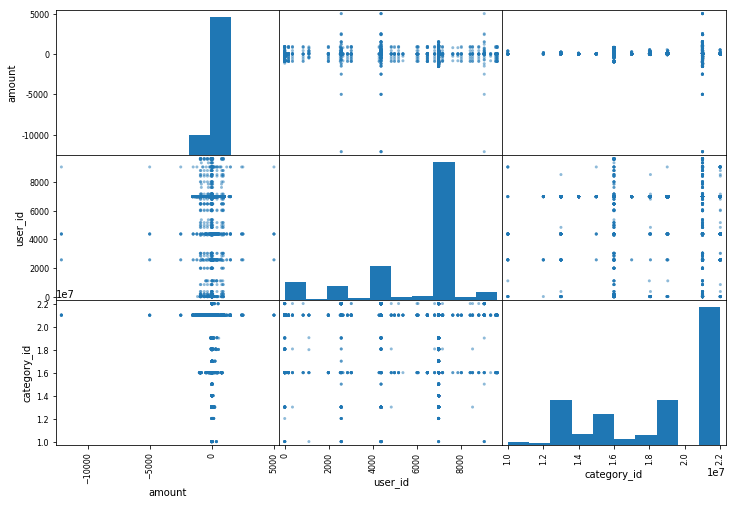

In [8]:
from pandas.tools.plotting import scatter_matrix

attributes = ["amount", "user_id", "category_id",
"date"]

scatter_matrix(df[attributes], figsize=(12, 8))

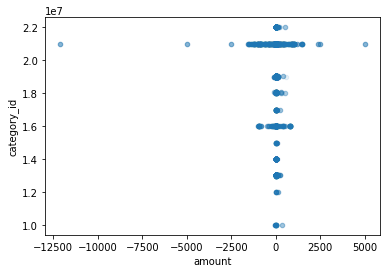

In [9]:
df.plot(
    kind="scatter", x="amount", y="category_id",
    alpha=0.1)

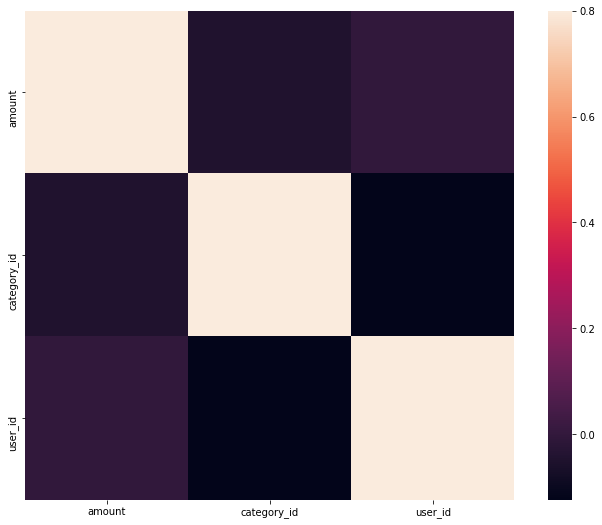

In [10]:
#correlation matrix
import seaborn as sns 
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

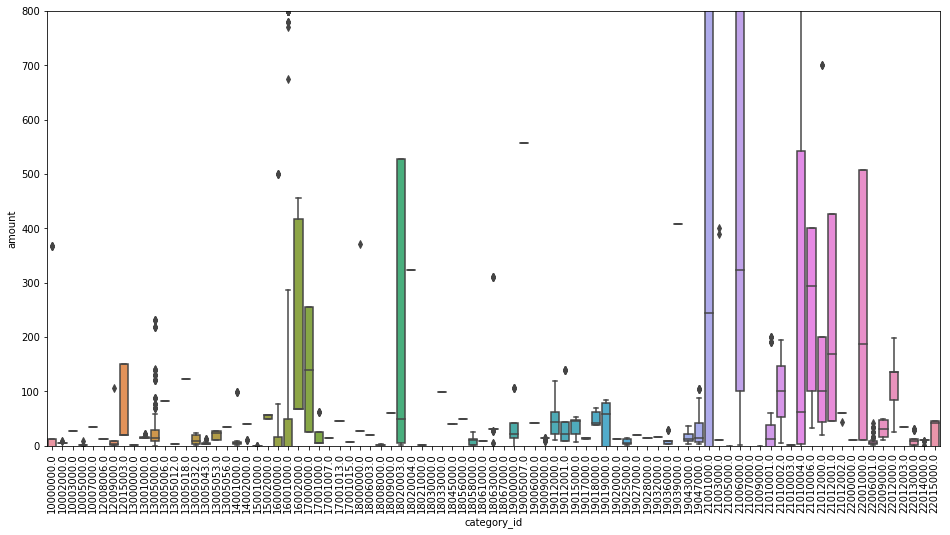

In [11]:
var = 'category_id'
data = pd.concat([df['amount'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="amount", data=data)
fig.axis(ymin=0, ymax=800);
plt.xticks(rotation=90);

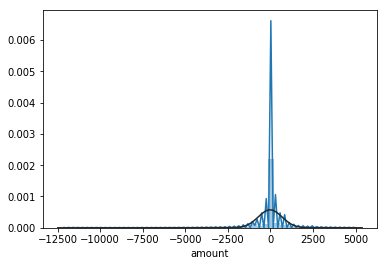

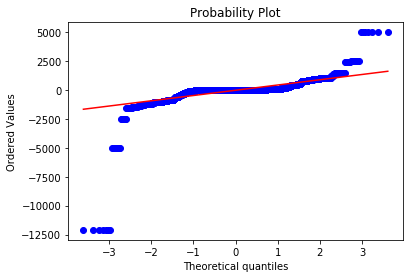

In [12]:
#histogram and normal probability plot
#perform data exploration to know more about data 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler 
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 
import seaborn as sns 
sns.distplot(df['amount'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['amount'], plot=plt)

In [13]:
corr_matrix = df.corr()

corr_matrix['amount'].sort_values(ascending=False)

amount         1.000000
user_id       -0.002161
category_id   -0.047599
Name: amount, dtype: float64

In [14]:
def get_data():
    return df
reviews = get_data()
reviews.head(3)

,account_id,amount,date,name,category,category_id,user_id
0,MMyB5JRbmJUB8QrpdnLdUo4MBwkvqMSQ6Y3w0,10,2017-11-24 00:00:00,Bill Payment CITI CARDS CBOL 10021,Transfer,21003000.0,1.0
1,E56dBbR4rbiYaB8730L3SYjKo6P3AKsw4DBNn,-10,2017-11-24 00:00:00,PAYMENT THANK YOU,Payment,16001000.0,1.0
2,MMyB5JRbmJUB8QrpdnLdUo4MBwkvqMSQ6Y3w0,800,2017-11-13 00:00:00,ACH Electronic Debit - DISCOVER E-PAYMENT 653,Payment,16001000.0,1.0


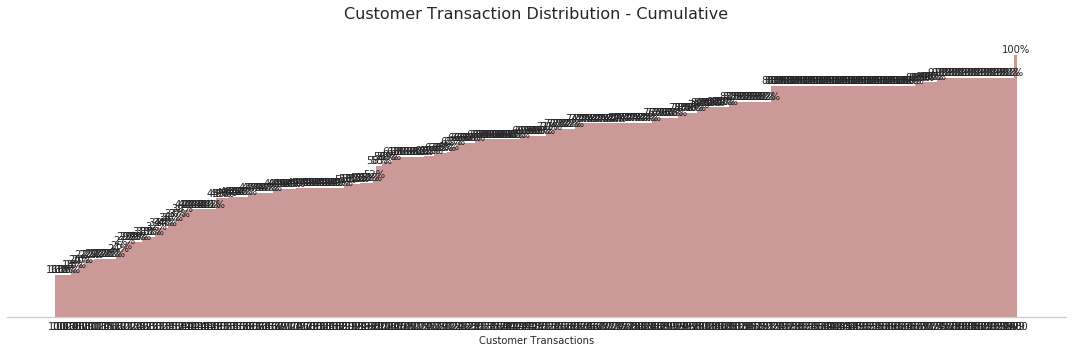

In [15]:
def ratings(data, cumulative):
    %matplotlib inline
    bin_start = 100
    bin_end = 400
    x_val = range(bin_start, bin_end + 1)
    sns.set_style('white', grid_style)
    plt.figure(figsize=(15,5))
    heights, _, _ = plt.hist(reviews.amount, normed=True, rwidth=1.6, bins=x_val, 
                             color='#CC9999', align='left', cumulative=cumulative)
    plt.xticks(x_val)
    plt.yticks([])
    plt.xlabel('Customer Transactions')
    if cumulative:
        plt.title("Customer Transaction Distribution - Cumulative\n", fontsize=16)
    else:
        plt.title("Customer Transaction Distribution\n", fontsize=16)
    
    sns.despine(left=True)
    yoffset = heights.max() * 0.01
    for x in range(bin_start, bin_end):
        plt.text(x, heights[x-bin_start] + yoffset, '{:.0%}'.format(heights[x-bin_start]), ha='center')
    plt.tight_layout()
    if cumulative:
        plt.savefig('points_cumulative.jpg', dpi=200)
    else:
        plt.savefig('points_bin.jpg', dpi=200)
ratings(reviews, True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4528 entries, 0 to 4527
Data columns (total 7 columns):
account_id     4528 non-null object
amount         4528 non-null int64
date           4528 non-null object
name           4528 non-null object
category       4528 non-null object
category_id    4197 non-null float64
user_id        4441 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 247.7+ KB


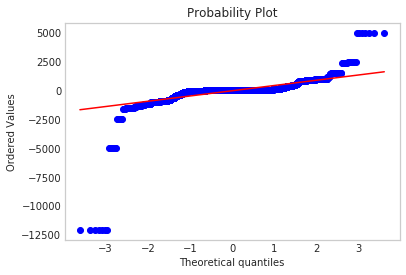

In [17]:
fig = plt.figure()
stats.probplot(df['amount'], plot=plt)
plt.show()

#  DATA PREPROCESSING AND DATA CLEANING TO RUN THE ML MODEL 

In [18]:
import numpy as np
import pandas as pd
import re 
import os 
import codecs
from sklearn import feature_extraction 
import mpld3 
import nltk
import pandas as pd 
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
df.head()

,account_id,amount,date,name,category,category_id,user_id
0,MMyB5JRbmJUB8QrpdnLdUo4MBwkvqMSQ6Y3w0,10,2017-11-24 00:00:00,Bill Payment CITI CARDS CBOL 10021,Transfer,21003000.0,1.0
1,E56dBbR4rbiYaB8730L3SYjKo6P3AKsw4DBNn,-10,2017-11-24 00:00:00,PAYMENT THANK YOU,Payment,16001000.0,1.0
2,MMyB5JRbmJUB8QrpdnLdUo4MBwkvqMSQ6Y3w0,800,2017-11-13 00:00:00,ACH Electronic Debit - DISCOVER E-PAYMENT 653,Payment,16001000.0,1.0
3,E56dBbR4rbiYaB8730L3SYjKo6P3AKsw4DBNn,-921,2017-11-10 00:00:00,PAYMENT THANK YOU,Payment,16001000.0,1.0
4,MMyB5JRbmJUB8QrpdnLdUo4MBwkvqMSQ6Y3w0,921,2017-11-10 00:00:00,Transfer to MasterCard 08:22p #0256 ONLINE Re,Transfer,21006000.0,1.0


In [20]:
cols = [0,1]
df.drop(df.columns[cols],axis=1,inplace=True)
df_frame = df.copy()

In [21]:
df_frame

,date,name,category,category_id,user_id
0,2017-11-24 00:00:00,Bill Payment CITI CARDS CBOL 10021,Transfer,21003000.0,1.0
1,2017-11-24 00:00:00,PAYMENT THANK YOU,Payment,16001000.0,1.0
2,2017-11-13 00:00:00,ACH Electronic Debit - DISCOVER E-PAYMENT 653,Payment,16001000.0,1.0
3,2017-11-10 00:00:00,PAYMENT THANK YOU,Payment,16001000.0,1.0
4,2017-11-10 00:00:00,Transfer to MasterCard 08:22p #0256 ONLINE Re,Transfer,21006000.0,1.0
5,2017-11-09 00:00:00,ACH Electronic Credit PAYROLL ST OF CA CA PAY,Transfer,21009000.0,1.0
6,2017-11-09 00:00:00,ACH Electronic Credit PAYROLL ST OF CA CA PAY,Transfer,21009000.0,1.0
7,2017-11-09 00:00:00,Citibank Global Transfer 11/09 03:11p 5262258,Transfer,21005000.0,1.0
8,2017-11-06 00:00:00,Bill Payment CITI CARDS CBOL 20171105 010020,Transfer,21003000.0,1.0
9,2017-11-05 00:00:00,PAYMENT THANK YOU,Payment,16001000.0,1.0


In [22]:
cols = [3]
df.drop(df.columns[cols],axis=1,inplace=True)
df_frame = df.copy()

In [23]:
df_frame

,date,name,category,user_id
0,2017-11-24 00:00:00,Bill Payment CITI CARDS CBOL 10021,Transfer,1.0
1,2017-11-24 00:00:00,PAYMENT THANK YOU,Payment,1.0
2,2017-11-13 00:00:00,ACH Electronic Debit - DISCOVER E-PAYMENT 653,Payment,1.0
3,2017-11-10 00:00:00,PAYMENT THANK YOU,Payment,1.0
4,2017-11-10 00:00:00,Transfer to MasterCard 08:22p #0256 ONLINE Re,Transfer,1.0
5,2017-11-09 00:00:00,ACH Electronic Credit PAYROLL ST OF CA CA PAY,Transfer,1.0
6,2017-11-09 00:00:00,ACH Electronic Credit PAYROLL ST OF CA CA PAY,Transfer,1.0
7,2017-11-09 00:00:00,Citibank Global Transfer 11/09 03:11p 5262258,Transfer,1.0
8,2017-11-06 00:00:00,Bill Payment CITI CARDS CBOL 20171105 010020,Transfer,1.0
9,2017-11-05 00:00:00,PAYMENT THANK YOU,Payment,1.0


In [28]:
df1 = df_frame.iloc[:,1:2]

In [29]:
df1

,name
0,Bill Payment CITI CARDS CBOL 10021
1,PAYMENT THANK YOU
2,ACH Electronic Debit - DISCOVER E-PAYMENT 653
3,PAYMENT THANK YOU
4,Transfer to MasterCard 08:22p #0256 ONLINE Re
5,ACH Electronic Credit PAYROLL ST OF CA CA PAY
6,ACH Electronic Credit PAYROLL ST OF CA CA PAY
7,Citibank Global Transfer 11/09 03:11p 5262258
8,Bill Payment CITI CARDS CBOL 20171105 010020
9,PAYMENT THANK YOU


In [30]:
df1.name = df1.name.apply(lambda x: x.lower())
#df1.name = df1.name.apply(lambda x: x.translate(None, string.punctuation))
#df1.name = df1.name.apply(lambda x: x.translate(None, string.digits))
#remove the numbers and the special characters from the strings 
df1['name'] = df1['name'].str.replace('\d+', '')
df1['name']=df1.replace('\#','',regex=True).astype(str)
df1['name']=df1.replace('\:','',regex=True).astype(str)
df1['name']=df1.replace('\+','',regex=True).astype(str)
df1['name']=df1.replace('\-','',regex=True).astype(str)
df1['name']=df1.replace('\;','',regex=True).astype(str)
df1

,name
0,bill payment citi cards cbol
1,payment thank you
2,ach electronic debit discover epayment
3,payment thank you
4,transfer to mastercard p online re
5,ach electronic credit payroll st of ca ca pay
6,ach electronic credit payroll st of ca ca pay
7,citibank global transfer / p
8,bill payment citi cards cbol
9,payment thank you


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(df1['name'])
print(type(x))

In [ ]:
#calculated the cosine similarity between the tfidf matrix 
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(x)
print(type(dist))

In [61]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(x)
df1["Cluster"]= x
df1

clusters = km.labels_.tolist()

CPU times: user 701 ms, sys: 12.9 ms, total: 714 ms
Wall time: 735 ms


In [62]:
import pandas as pd
frame = pd.DataFrame(index = [clusters] , columns = ['account_id', 'amount', 'name','cluster', 'category_id'])

In [ ]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
term = v.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i),
    df1["Cluster"]= i
    df1
    for ind in order_centroids[i, :10]:
        print(' %s' % term[ind]),
    print
        

print("\n")
print("Prediction")

Y = v.transform(["ach, electronic, Debit, CA, Avalon, Mo."])
prediction = km.predict(Y)
print(prediction)

Y = v.transform(["online, banking, transfer, conf."])
prediction = km.predict(Y)
print(prediction)


In [364]:
import nltk
from nltk.corpus import stopwords
set(stopwords.words('english'))
import nltk
from nltk.corpus import stopwords
stopset = set(nltk.corpus.stopwords.words('english'))
def removeStopWords(str):
    stopset.update(('CBOL','so','cant','Yes','yes','No','no','These','these', 'CA','/'))
    new_str = ([word for word in str.split() if word not in stopset])
    return new_str

In [365]:
lol = df1.to_string()
removeStopWords(lol)

['name',
 'tokenized_sents',
 'Transaction',
 '0',
 'bill',
 'payment',
 'citi',
 'cards',
 'cbol',
 '[bill,',
 'payment,',
 'citi,',
 'cards,',
 'cbol]',
 '[bill,',
 'payment,',
 'citi,',
 'cards,',
 'cbol]',
 '1',
 'payment',
 'thank',
 '[payment,',
 'thank,',
 'you]',
 '[payment,',
 'thank]',
 '2',
 'ach',
 'electronic',
 'debit',
 'discover',
 'epayment',
 '[ach,',
 'electronic,',
 'debit,',
 'discover,',
 'epayment]',
 '[ach,',
 'electronic,',
 'debit,',
 'discover,',
 'epayment]',
 '3',
 'payment',
 'thank',
 '[payment,',
 'thank,',
 'you]',
 '[payment,',
 'thank]',
 '4',
 'transfer',
 'mastercard',
 'p',
 'online',
 '[transfer,',
 'to,',
 'mastercard,',
 'p,',
 'online,',
 're]',
 '[transfer,',
 'mastercard,',
 'p,',
 'online]',
 '5',
 'ach',
 'electronic',
 'credit',
 'payroll',
 'st',
 'ca',
 'ca',
 'pay',
 '[ach,',
 'electronic,',
 'credit,',
 'payroll,',
 'st,',
 'of,',
 'ca,...',
 '[ach,',
 'electronic,',
 'credit,',
 'payroll,',
 'st,',
 'ca,',
 'ca,...',
 '6',
 'ach',
 'e

In [342]:
#remove numbers and get a bag of words in the form of list 
no_integers = [x for x in si if not (x.isdigit() 
                                         or x[0] == '-' and x[1:].isdigit())]
no_integers

['bill',
 'payment',
 'citi',
 'cards',
 'cbol',
 'payment',
 'thank',
 'you',
 'ach',
 'electronic',
 'debit',
 'discover',
 'epayment',
 'payment',
 'thank',
 'you',
 'transfer',
 'to',
 'mastercard',
 'p',
 'online',
 're',
 'ach',
 'electronic',
 'credit',
 'payroll',
 'st',
 'of',
 'ca',
 'ca',
 'pay',
 'ach',
 'electronic',
 'credit',
 'payroll',
 'st',
 'of',
 'ca',
 'ca',
 'pay',
 'citibank',
 'global',
 'transfer',
 '/',
 'p',
 'bill',
 'payment',
 'citi',
 'cards',
 'cbol',
 'payment',
 'thank',
 'you',
 'bartfremont',
 'qps',
 'ach',
 'electronic',
 'debit',
 'ca',
 'avalon',
 'mo',
 'web',
 'p',
 'wf',
 'studentinsurance',
 'ultra',
 'mobile',
 'papa',
 "john's",
 'bill',
 'payment',
 'citi',
 'cards',
 'cbol',
 'payment',
 'thank',
 'you',
 'ach',
 'electronic',
 'debit',
 'discover',
 'epayment',
 'payment',
 'thank',
 'you',
 'transfer',
 'to',
 'mastercard',
 'p',
 'online',
 're',
 'ach',
 'electronic',
 'credit',
 'payroll',
 'st',
 'of',
 'ca',
 'ca',
 'pay',
 'ach',

In [234]:
import re
import nltk
def removespecial(str):
    for line in text:
    # decode line to worrk with utf8 symbols
        line = line.replace('+', ' ').replace('.', ' ').replace(',', ' ').replace(':', ' ')
    # remove digits with regex
        line = re.sub("(^|\W)\d+($|\W)", " ", line)
        # OR remove digits with casting to int
        new_line = []
        for word in line.split():
            if not is_digit(word):
                new_line.append(word)
        line = " ".join(new_line)
        # transliterate to Latin characters
        line = transliterate(line)
        line = line.lower()
        return line
        #remove stop words
        #new_str = ' '.join([word for word in str.split()) 
        #return new_str

df1.name = df1.name.apply(lambda x: x.translate(None, string.punctuation))
df1

In [126]:
import nltk
from nltk.corpus import stopwords
set(stopwords.words('english'))
import nltk
from nltk.corpus import stopwords
stopset = set(nltk.corpus.stopwords.words('english'))

In [276]:

def removeStopWords(str):
    stopset.update(('CBOL','so','cant','Yes','yes','No','no','These','these', 'CA','#0256','11/30'))
    #remove stop words
    #new_str = ' '.join([word for word in str.split() if word not in stopset])
    new_str = ([word for word in str.split() if word not in stopset])
    #for line in new_str:
    #    line = line.replace('+', ' ').replace('.', ' ').replace(',', ' ').replace(':', ' ')
    #    line = re.sub("(^|\W)\d+($|\W)", " ", line)
    return new_str

In [277]:
lol = df1.to_string()

In [278]:
removeStopWords(lol)

['name',
 '0',
 'Bill',
 'Payment',
 'CITI',
 'CARDS',
 '10021',
 '1',
 'PAYMENT',
 'THANK',
 'YOU',
 '2',
 'ACH',
 'Electronic',
 'Debit',
 '-',
 'DISCOVER',
 'E-PAYMENT',
 '653',
 '3',
 'PAYMENT',
 'THANK',
 'YOU',
 '4',
 'Transfer',
 'MasterCard',
 '08:22p',
 'ONLINE',
 'Re',
 '5',
 'ACH',
 'Electronic',
 'Credit',
 'PAYROLL',
 'ST',
 'OF',
 'PAY',
 '6',
 'ACH',
 'Electronic',
 'Credit',
 'PAYROLL',
 'ST',
 'OF',
 'PAY',
 '7',
 'Citibank',
 'Global',
 'Transfer',
 '11/09',
 '03:11p',
 '5262258',
 '8',
 'Bill',
 'Payment',
 'CITI',
 'CARDS',
 '20171105',
 '010020',
 '9',
 'PAYMENT',
 'THANK',
 'YOU',
 '10',
 'BART-FREMONT',
 'QPS',
 '11',
 'ACH',
 'Electronic',
 'Debit',
 '-',
 'CA102-',
 'Avalon',
 'Mo',
 'WEB',
 'P',
 '12',
 'WF',
 'STUDENTINSURANCE',
 '08008535899',
 '13',
 'ULTRA',
 'MOBILE',
 '14',
 'Papa',
 "John's",
 '15',
 'Bill',
 'Payment',
 'CITI',
 'CARDS',
 '10021',
 '16',
 'PAYMENT',
 'THANK',
 'YOU',
 '17',
 'ACH',
 'Electronic',
 'Debit',
 '-',
 'DISCOVER',
 'E-PAYMEN

In [376]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["chrome browser to open."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)
 

Top terms per cluster:
Cluster 0:
 cat
 best
 climbing
 ninja
 ve
 photo
 taken
 belly
 merley
 kitten
Cluster 1:
 google
 translate
 app
 feedback
 impressed
 map
 incredible
 extension
 promoter
 chrome


Prediction
[1]
[0]
